# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [4]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [6]:
# Read the census data into a Pandas DataFrame
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [7]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_mean = sfo_data.groupby(['year']).mean()
sfo_mean

sale_price_sqr_foot  housing_units  gross_rent
year                                                
2010           369.344353         372560        1239
2011           341.903429         374507        1530
2012           399.389968         376454        2324
2013           483.600304         378401        2971
2014           556.277273         380348        3528
2015           632.540352         382295        3739
2016           697.643709         384242        4390

In [8]:
mean_units = sfo_mean[['housing_units']]
mean_units

housing_units
year               
2010         372560
2011         374507
2012         376454
2013         378401
2014         380348
2015         382295
2016         384242

In [9]:
# Save the dataframe as a csv file
mean_units.to_csv("mean_units.csv",index=False)


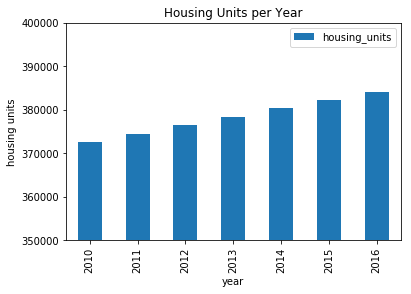

In [148]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart

# plot objects
mean_units.plot.bar(title="Housing Units per Year", ylabel="housing units", ylim=(350000,400000))

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [11]:
# Calculate the average sale price per square foot and average gross rent
avg_sqrfoot = sfo_mean[['sale_price_sqr_foot']]
avg_sqrfoot.round(2)

sale_price_sqr_foot
year                     
2010               369.34
2011               341.90
2012               399.39
2013               483.60
2014               556.28
2015               632.54
2016               697.64

In [12]:
avg_grossrent = sfo_mean[['gross_rent']]
avg_grossrent

gross_rent
year            
2010        1239
2011        1530
2012        2324
2013        2971
2014        3528
2015        3739
2016        4390

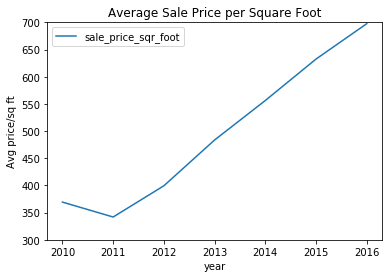

In [13]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
avg_sqrfoot.plot(ylim=(300,700), title="Average Sale Price per Square Foot", ylabel='Avg price/sq ft')



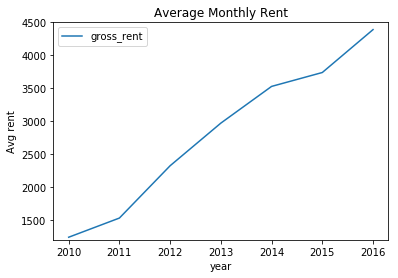

In [14]:
# Line chart for average montly rent
avg_grossrent.plot(ylim=(1200,4500), title="Average Monthly Rent", ylabel='Avg rent')

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [15]:
# Group by year and neighborhood and then create a new dataframe of the mean values

sfo_means = sfo_data.groupby(['year', 'neighborhood']).mean()
sfo_means

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945         372560        1239
     Anza Vista                       267.932583         372560        1239
     Bayview                          170.098665         372560        1239
     Buena Vista Park                 347.394919         372560        1239
     Central Richmond                 319.027623         372560        1239
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771         384242        4390
     Twin Peaks                       970.085470         384242        4390
     Van Ness/ Civic Center           552.602567         384242        4390
     Visitacion Valley                328.319007         384242        4390
     Westwood Park                    631.195426         384242        4390

[397 rows x 3 columns]

In [22]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
sfo_means.hvplot.line(x="year", y="sale_price_sqr_foot", xlabel="Year", ylabel="Average price/sq ft", groupby="neighborhood", title="Average Price/Sq Foot By Neighborhood")

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [24]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
sfo_means.hvplot.line(x="year", y="gross_rent", xlabel="Year", ylabel="Average mthly rent", groupby="neighborhood", title="Average Monthly Rent by Neighborhood")

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [102]:
# Getting the data from the top 10 expensive neighborhoods to own
# First step I created the dataframe sorted by neighborhood
sfo_exp = sfo_data.groupby(['neighborhood']).mean()
sfo_exp

sale_price_sqr_foot  housing_units   gross_rent
neighborhood                                                       
Alamo Square                 366.020712      378401.00  2817.285714
Anza Vista                   373.382198      379050.00  3031.833333
Bayview                      204.588623      376454.00  2318.400000
Bayview Heights              590.792839      382295.00  3739.000000
Bernal Heights               576.746488      379374.50  3080.333333
...                                 ...            ...          ...
West Portal                  498.488485      376940.75  2515.500000
Western Addition             307.562201      377427.50  2555.166667
Westwood Highlands           533.703935      376454.00  2250.500000
Westwood Park                687.087575      382295.00  3959.000000
Yerba Buena                  576.709848      377427.50  2555.166667

[73 rows x 3 columns]

In [63]:
#Second step I pulled only the sale_price_sqr_foot column
sfo_exp_sqft = sfo_exp[['sale_price_sqr_foot']]
sfo_exp_sqft

sale_price_sqr_foot
neighborhood                              
South Beach                     650.124479
Potrero Hill                    662.013613
Cow Hollow                      665.964042
Presidio Heights                675.350212
Telegraph Hill                  676.506578
Westwood Park                   687.087575
Pacific Heights                 689.555817
Miraloma Park                   779.810842
Merced Heights                  788.844818
Union Square District           903.993258

In [152]:
#Third step I sorted values and took the last 10 to show the top 10 most expensive neighborhoods
sfo_exp_sqft = sfo_exp_sqft.sort_values(by=['sale_price_sqr_foot'])
sfo_10exp = sfo_exp_sqft.tail(10)
sfo_10exp

sale_price_sqr_foot
neighborhood                              
South Beach                     650.124479
Potrero Hill                    662.013613
Cow Hollow                      665.964042
Presidio Heights                675.350212
Telegraph Hill                  676.506578
Westwood Park                   687.087575
Pacific Heights                 689.555817
Miraloma Park                   779.810842
Merced Heights                  788.844818
Union Square District           903.993258

In [157]:
sfo_10exp.hvplot.bar(ylim=(600,1000), title="Top 10 Most Expensive Neighborhoods", rot=45)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [25]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
sfo_means

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945         372560        1239
     Anza Vista                       267.932583         372560        1239
     Bayview                          170.098665         372560        1239
     Buena Vista Park                 347.394919         372560        1239
     Central Richmond                 319.027623         372560        1239
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771         384242        4390
     Twin Peaks                       970.085470         384242        4390
     Van Ness/ Civic Center           552.602567         384242        4390
     Visitacion Valley                328.319007         384242        4390
     Westwood Park                    631.195426         384242        4390

[397 rows x 3 columns]

In [54]:
# First step is to only pull the sale price/sq foot and gross rent column since we are comparing the two
sfo_means = sfo_means[['sale_price_sqr_foot', 'gross_rent']]
sfo_means

sale_price_sqr_foot  gross_rent
year neighborhood                                           
2010 Alamo Square                     291.182945        1239
     Anza Vista                       267.932583        1239
     Bayview                          170.098665        1239
     Buena Vista Park                 347.394919        1239
     Central Richmond                 319.027623        1239
...                                          ...         ...
2016 Telegraph Hill                   903.049771        4390
     Twin Peaks                       970.085470        4390
     Van Ness/ Civic Center           552.602567        4390
     Visitacion Valley                328.319007        4390
     Westwood Park                    631.195426        4390

[397 rows x 2 columns]

In [59]:
# Plotting the data side by side - two different color lines to show comparison

sfo_means.hvplot(ylabel="dollars", xlabel="year", title="Rent vs Price", groupby="neighborhood")

:DynamicMap   [neighborhood]
   :NdOverlay   [Variable]
      :Curve   [year]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [61]:
# Load neighborhoods coordinates data
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)
neighborhood = pd.read_csv(
    Path("../../git/Unit6_homework/neighborhoods_coordinates.csv")
).dropna()
neighborhood.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [103]:
#I had to reset index so I could break out the neighborhood column
sfo_exp.reset_index(drop=False, inplace=True)
sfo_exp

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0         Alamo Square           366.020712      378401.00  2817.285714
1           Anza Vista           373.382198      379050.00  3031.833333
2              Bayview           204.588623      376454.00  2318.400000
3      Bayview Heights           590.792839      382295.00  3739.000000
4      Bernal Heights            576.746488      379374.50  3080.333333
..                 ...                  ...            ...          ...
68         West Portal           498.488485      376940.75  2515.500000
69    Western Addition           307.562201      377427.50  2555.166667
70  Westwood Highlands           533.703935      376454.00  2250.500000
71       Westwood Park           687.087575      382295.00  3959.000000
72         Yerba Buena           576.709848      377427.50  2555.166667

[73 rows x 4 columns]

In [104]:
#I renamed the Neighborhood column to match the column on the other df so I can combine without issues
sfo_exp
columns = ["Neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"]
sfo_exp.columns = columns
sfo_exp

Neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0         Alamo Square           366.020712      378401.00  2817.285714
1           Anza Vista           373.382198      379050.00  3031.833333
2              Bayview           204.588623      376454.00  2318.400000
3      Bayview Heights           590.792839      382295.00  3739.000000
4      Bernal Heights            576.746488      379374.50  3080.333333
..                 ...                  ...            ...          ...
68         West Portal           498.488485      376940.75  2515.500000
69    Western Addition           307.562201      377427.50  2555.166667
70  Westwood Highlands           533.703935      376454.00  2250.500000
71       Westwood Park           687.087575      382295.00  3959.000000
72         Yerba Buena           576.709848      377427.50  2555.166667

[73 rows x 4 columns]

In [128]:
# Join the average values with the neighborhood locations
joined_df = pd.concat([sfo_exp, neighborhood], axis="columns", join="inner")
joined_df

Neighborhood  sale_price_sqr_foot  housing_units   gross_rent  \
0         Alamo Square           366.020712      378401.00  2817.285714   
1           Anza Vista           373.382198      379050.00  3031.833333   
2              Bayview           204.588623      376454.00  2318.400000   
3      Bayview Heights           590.792839      382295.00  3739.000000   
4      Bernal Heights            576.746488      379374.50  3080.333333   
..                 ...                  ...            ...          ...   
68         West Portal           498.488485      376940.75  2515.500000   
69    Western Addition           307.562201      377427.50  2555.166667   
70  Westwood Highlands           533.703935      376454.00  2250.500000   
71       Westwood Park           687.087575      382295.00  3959.000000   
72         Yerba Buena           576.709848      377427.50  2555.166667   

          Neighborhood        Lat         Lon  
0         Alamo Square  37.791012 -122.402100  
1           Anza Vista  37.779598 -122.443451  
2              Bayview  37.734670 -122.401060  
3      Bayview Heights  37.728740 -122.410980  
4       Bernal Heights  37.728630 -122.443050  
..                 ...        ...         ...  
68         West Portal  37.740260 -122.463880  
69    Western Addition  37.792980 -122.435790  
70  Westwood Highlands  37.734700 -122.456854  
71       Westwood Park  37.734150 -122.457000  
72         Yerba Buena  37.792980 -122.396360  

[73 rows x 7 columns]

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

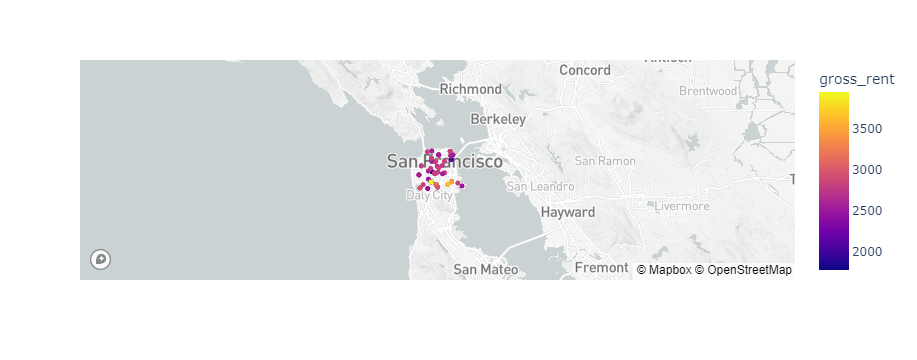

In [149]:
# Set the mapbox access token
# Completed above

# Create a scatter mapbox to analyze neighborhood info
map_1 = px.scatter_mapbox(
    joined_df,
    lat="Lat",
    lon="Lon",
    color="gross_rent"
)
map_1.show()

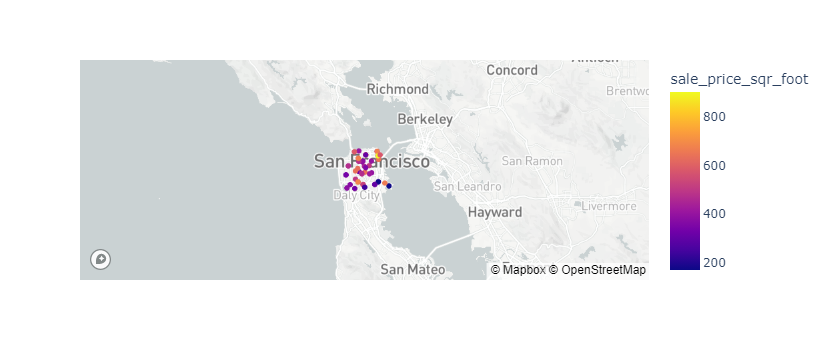

In [135]:
# Added map 2 to show color by sale price per square foot to compare with rent
map_2 = px.scatter_mapbox(
    joined_df,
    lat="Lat",
    lon="Lon",
    color="sale_price_sqr_foot"
)
map_2.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [ ]:
# Fetch the data from all expensive neighborhoods per year.

# OPTIONAL CHALLENGE - GOT STUCK AND WAS NOT ABLE TO TROUBLESHOOT DUE TO TIME CONSTRAINTS/DUE DATE
# Tried the following, but was getting error with "Neighborhood":
# df_expensive_neighborhoods_per_year = sfo_10exp[sfo_10exp["Neighborhood"]].isin(sfoexp["Neighborhood"])
# df_expensive_neighborhoods_per_year.head()



### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


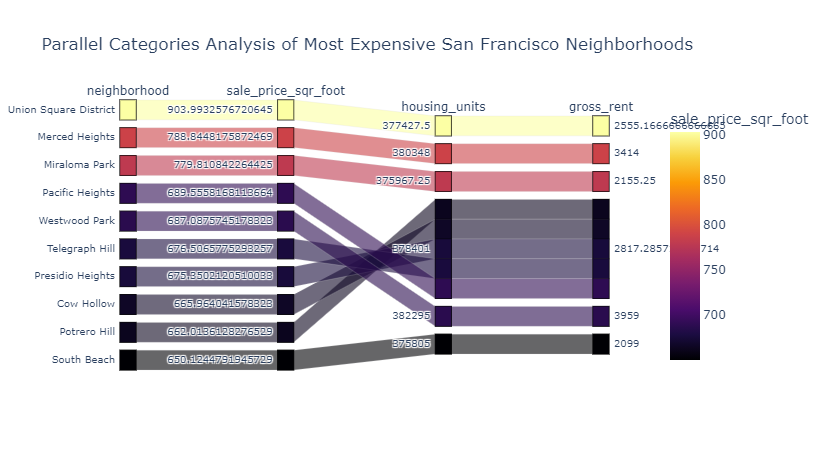

In [21]:
# Parallel Categories Plot

# OPTIONAL CHALLENGE - GOT STUCK ON FIRST PART AND WAS NOT ABLE TO COMPLETE DUE TO TIME CONSTRAINTS/DUE DATE
# If time allowed, would have used: 
# px.parallel_categories(
 #   df_expensive_neighborhoods_per_year,
 #   dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
 #    color="sale_price_sqr_foot",
 #    color_continuous_scale=px.colors.sequential.Inferno,
  #  labels={
  #      "neighborhood": "Neighborhood",
  #      "sale_price_sqr_foot": "Sale Price/Sq Foot",
  #      "housing_units": "Housing Units",
  #       "gross_rent": "Gross Rent",
  #  }
#)

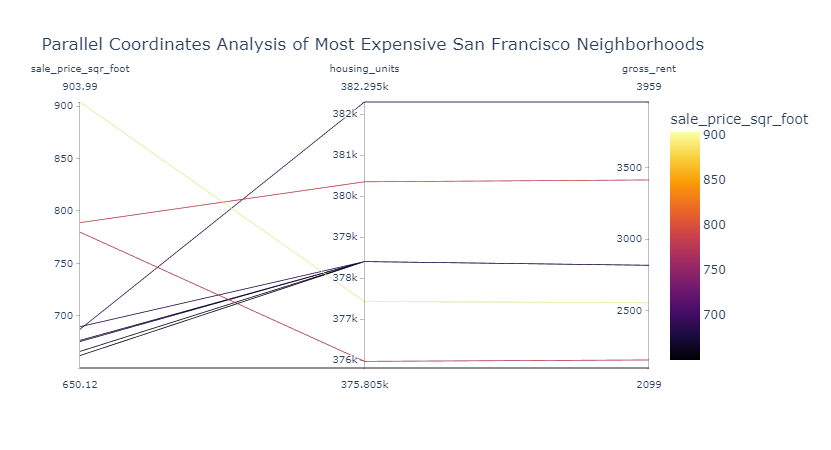

In [22]:
# Parallel Coordinates Plot

# OPTIONAL CHALLENGE - GOT STUCK ON FIRST PART AND WAS NOT ABLE TO COMPLETE DUE TO TIME CONSTRAINTS/DUE DATE
# If time allowed, would have used:
#px.parallel_coordinates(df_expensive_neighborhoods_per_year, color='sale_price_sqr_foot')

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

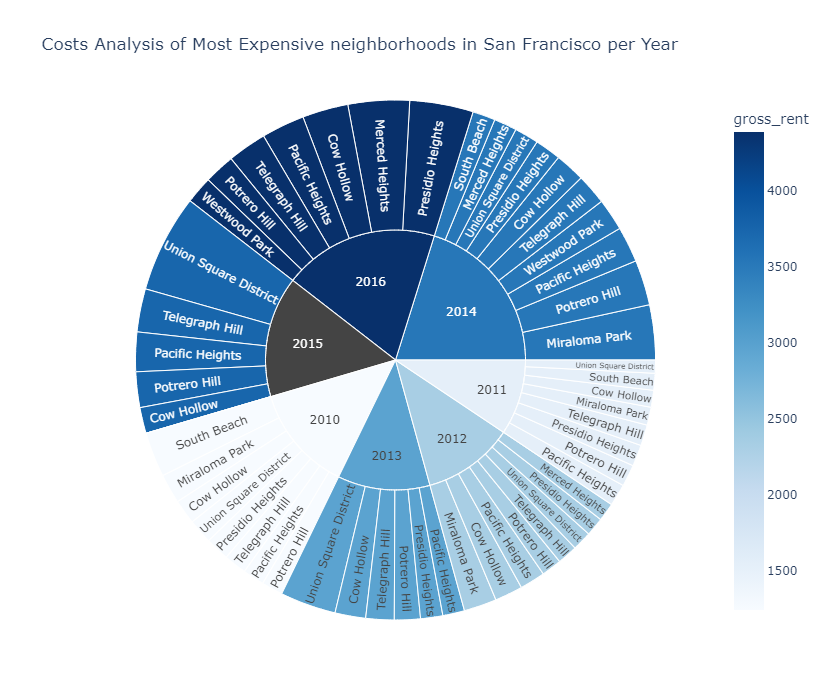

In [23]:
# Sunburst Plot

# OPTIONAL CHALLENGE - GOT STUCK ON FIRST PART AND WAS NOT ABLE TO COMPLETE DUE TO TIME CONSTRAINTS/DUE DATE
# If time allowed, would have tried to use something like the following:
# fig = px.sunburst(df, path=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"], values='sale_price_sqr_foot', color='gross_rent')
# fig.show()